# **Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# **Load Data**

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target

In [ ]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Handling Outliers**

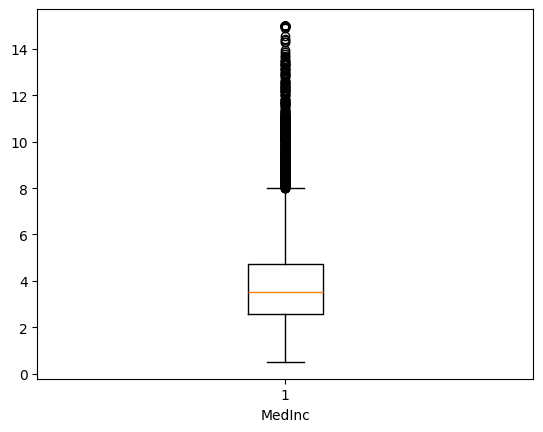

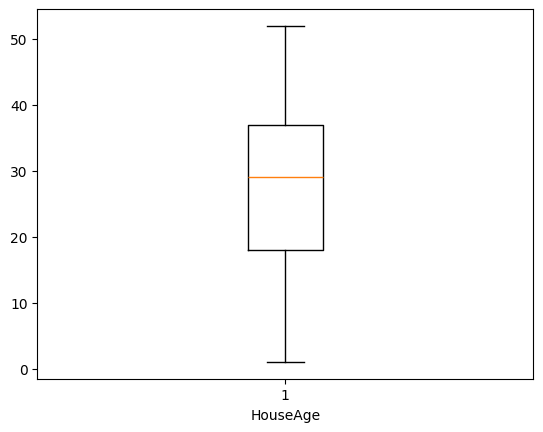

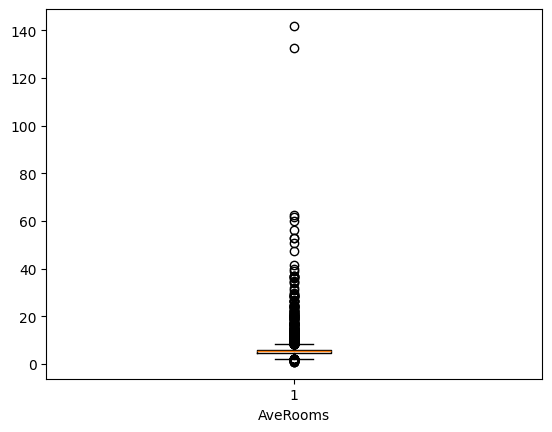

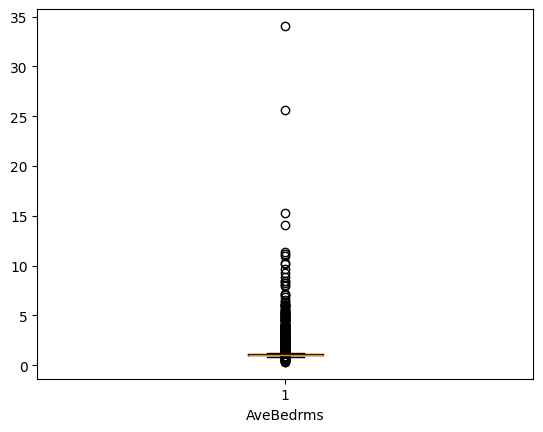

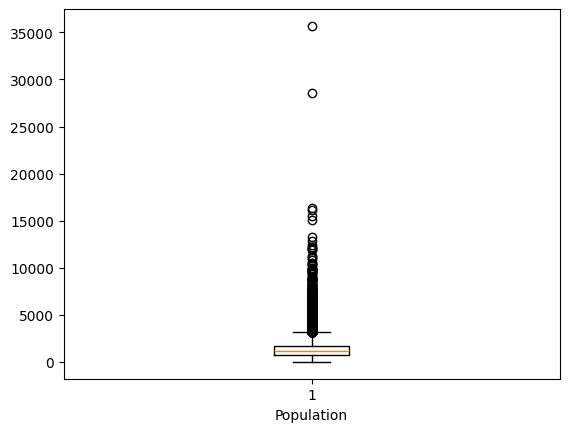

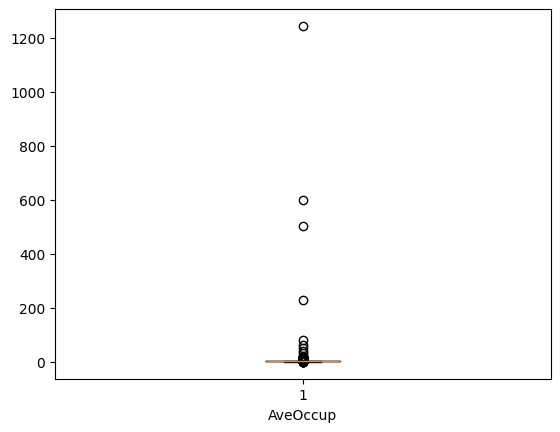

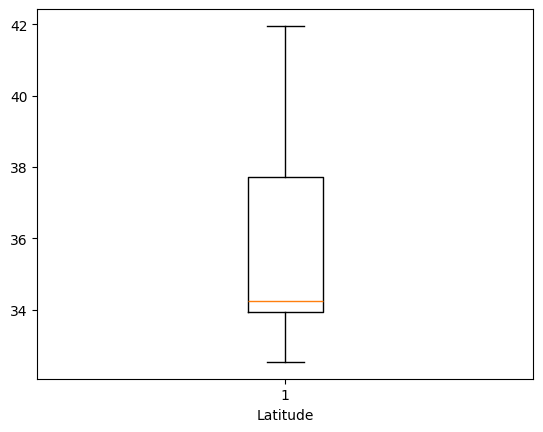

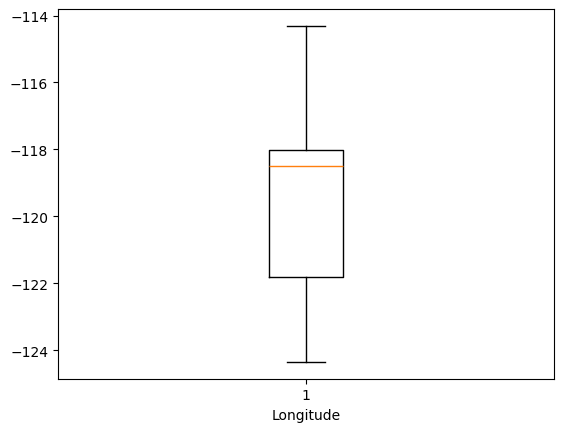

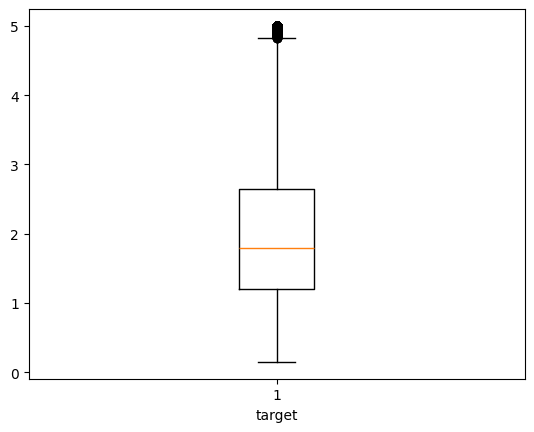

In [ ]:
for col in df.columns:
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()


In [ ]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols_to_handle = df.select_dtypes(include=np.number).columns.drop('Price_binned', errors='ignore')

for col in numerical_cols_to_handle:
    df = cap_outliers_iqr(df, col)

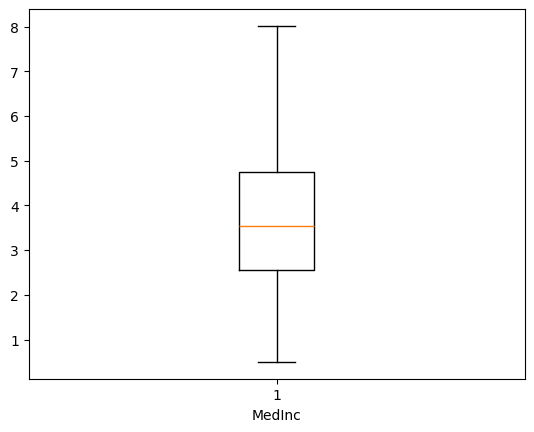

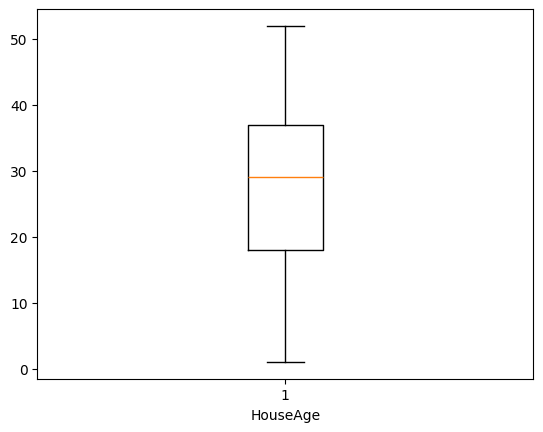

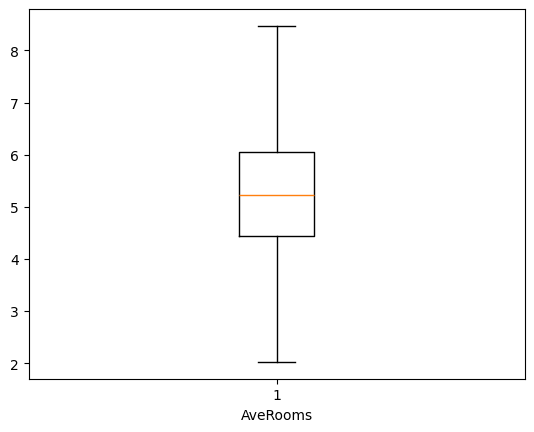

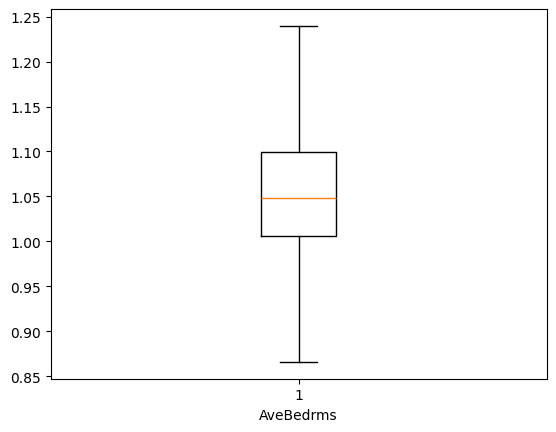

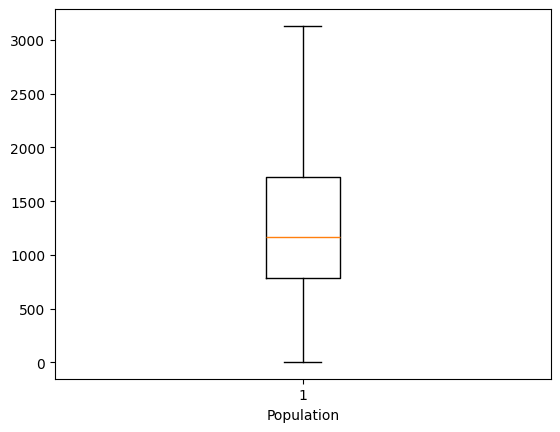

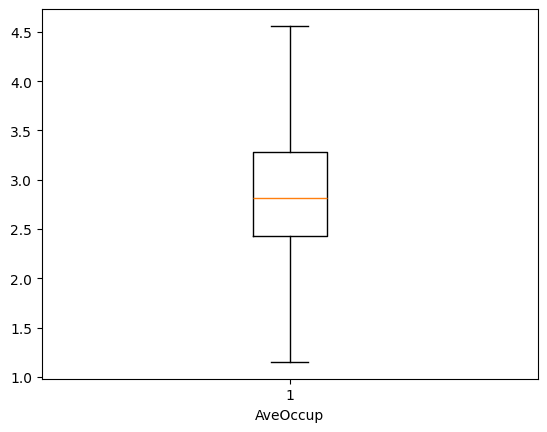

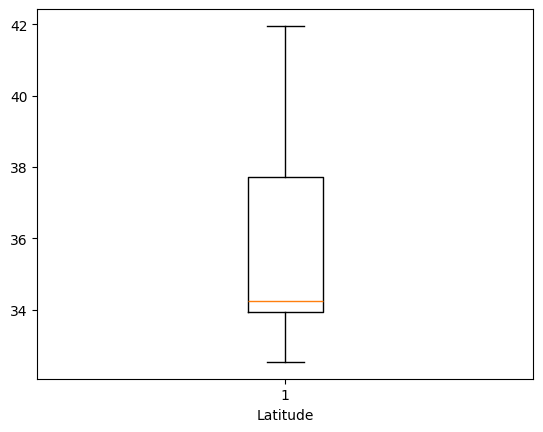

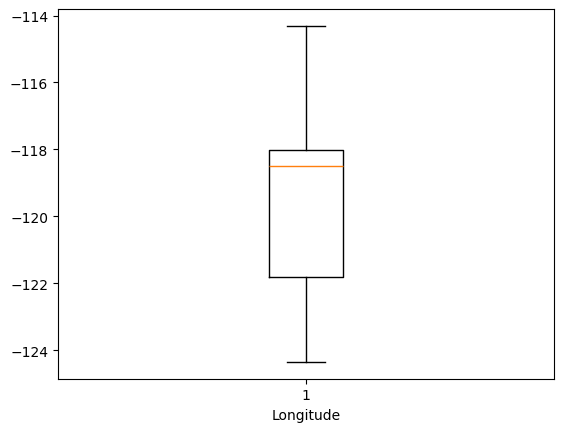

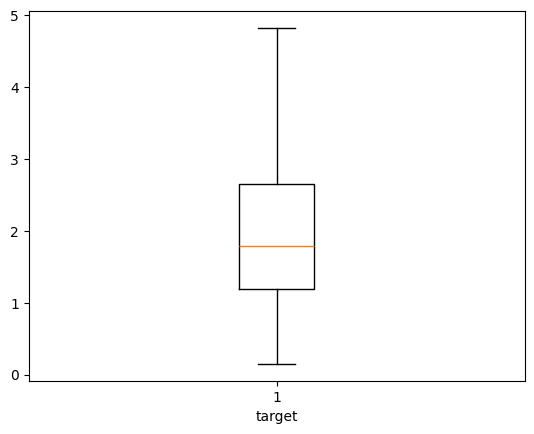

In [ ]:
for col in df.columns:
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()


In [ ]:
df.drop('target', axis = 1).corr().iloc[-1]

,Longitude
MedInc,-0.015461
HouseAge,-0.108197
AveRooms,-0.068379
AveBedrms,0.011850
Population,0.116115
AveOccup,0.178649
Latitude,-0.924664
Longitude,1.000000


# **Spliting Data**

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state=42)

In [ ]:
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=50, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [ ]:
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred1)
mse_xgb = mean_squared_error(y_test, y_pred2)
r2_rf = r2_score(y_test, y_pred1)
r2_xgb = r2_score(y_test, y_pred2)
print("Random Forest MSE:", mse_rf)
print("XGBoost MSE:", mse_xgb)
print("Random Forest R2 Score:", r2_rf)
print("XGBoost R2 Score:", r2_xgb)

Random Forest MSE: 0.242715224517924
XGBoost MSE: 0.2025329223525098
Random Forest R2 Score: 0.8080325505994592
XGBoost R2 Score: 0.8398133920075628


# **Visualize the results**

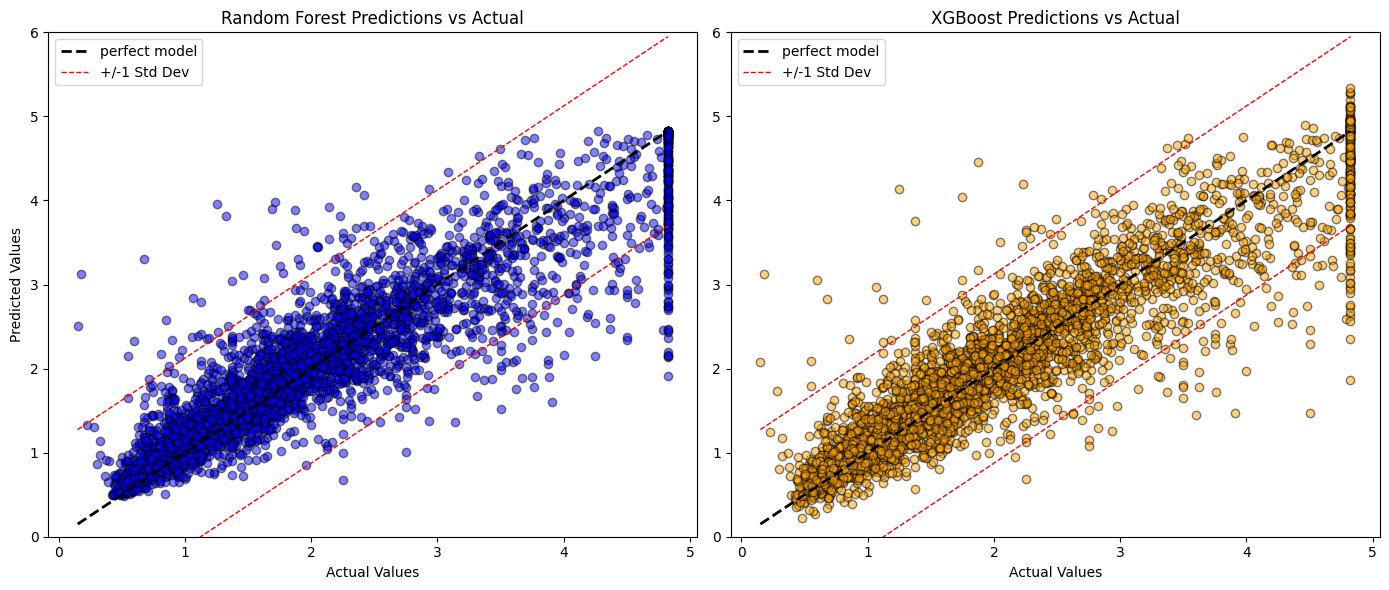

In [ ]:
std_y = np.std(y_test)
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred1, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred2, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()